In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from create_plots import import_dataframe, show_stats, show_plots

plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

Select the dataset name to evaluate:

In [2]:
#prefix="small_network"
#prefix="small_network_uniform"
#prefix="small_network_uniform_larger_msa"
#prefix="medium_network_norandom"
#prefix="medium_network_norandom_uniform"
#prefix="medium_network_norandom_uniform_larger_msa"
#prefix="small_network_uniform_big_msa"

prefix="small_network_new"
#prefix="medium_network_norandom_new"

In [3]:
print("This evaluation is for: " + prefix)

This evaluation is for: medium_network_norandom_new


In [4]:
df = import_dataframe(prefix)
print(df.columns)

Index(['name', 'n_taxa', 'n_trees', 'n_reticulations', 'msa_size',
       'sites_per_tree', 'sampling_type', 'simulation_type', 'celine_params',
       'brlen_scaler', 'seqgen_params', 'near_zero_branches_raxml',
       'n_equal_tree_pairs', 'true_network_weirdness', 'true_network_path',
       'inferred_network_path', 'likelihood_type', 'brlen_linkage_type',
       'start_type', 'timeout', 'n_random_start_networks',
       'n_parsimony_start_networks', 'runtime_inference',
       'n_reticulations_inferred', 'bic_true', 'logl_true', 'bic_inferred',
       'logl_inferred', 'bic_raxml', 'logl_raxml', 'rf_absolute_raxml',
       'rf_relative_raxml', 'rf_absolute_inferred', 'rf_relative_inferred',
       'hardwired_cluster_distance', 'softwired_cluster_distance',
       'displayed_trees_distance', 'tripartition_distance',
       'nested_labels_distance', 'path_multiplicity_distance', 'msa_patterns',
       'bic_diff', 'logl_diff', 'bic_diff_relative', 'logl_diff_relative',
       'msa_patt

# Original Simulated Dataset Statistics 

Total number of datasets: 212


<Figure size 1200x800 with 0 Axes>

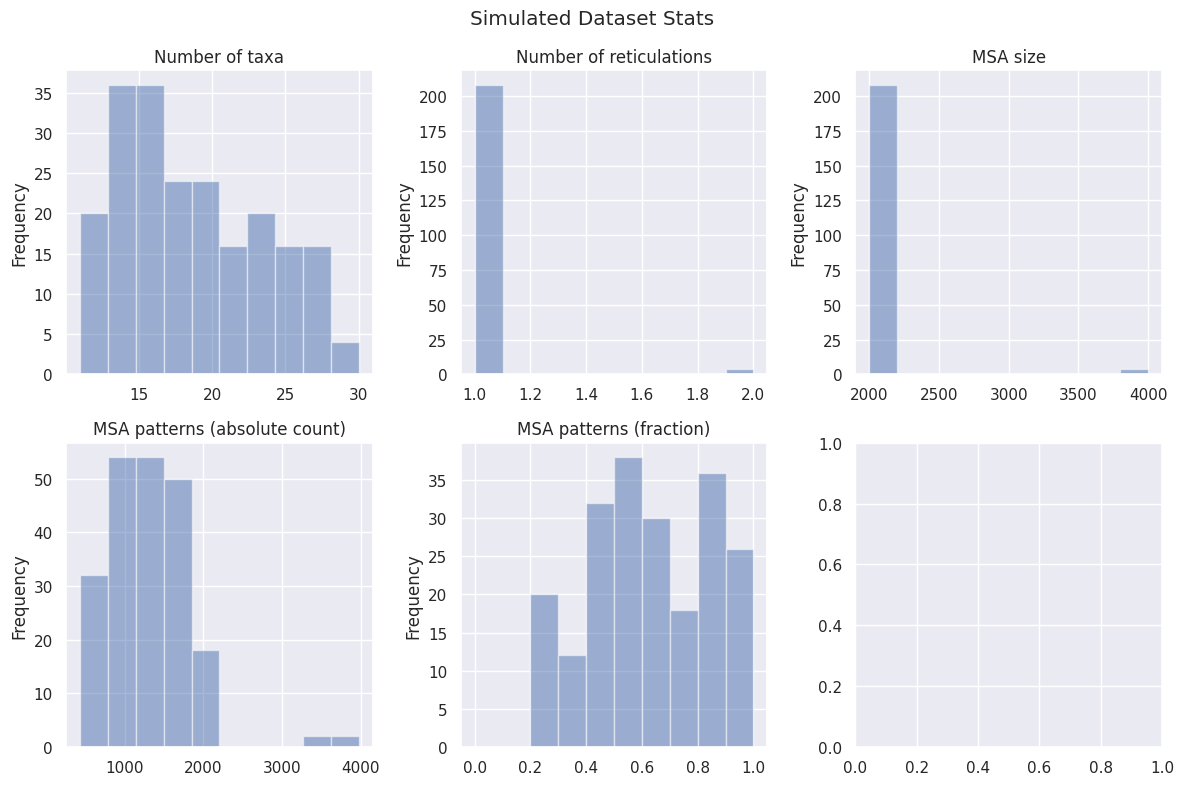

<Figure size 1200x800 with 0 Axes>

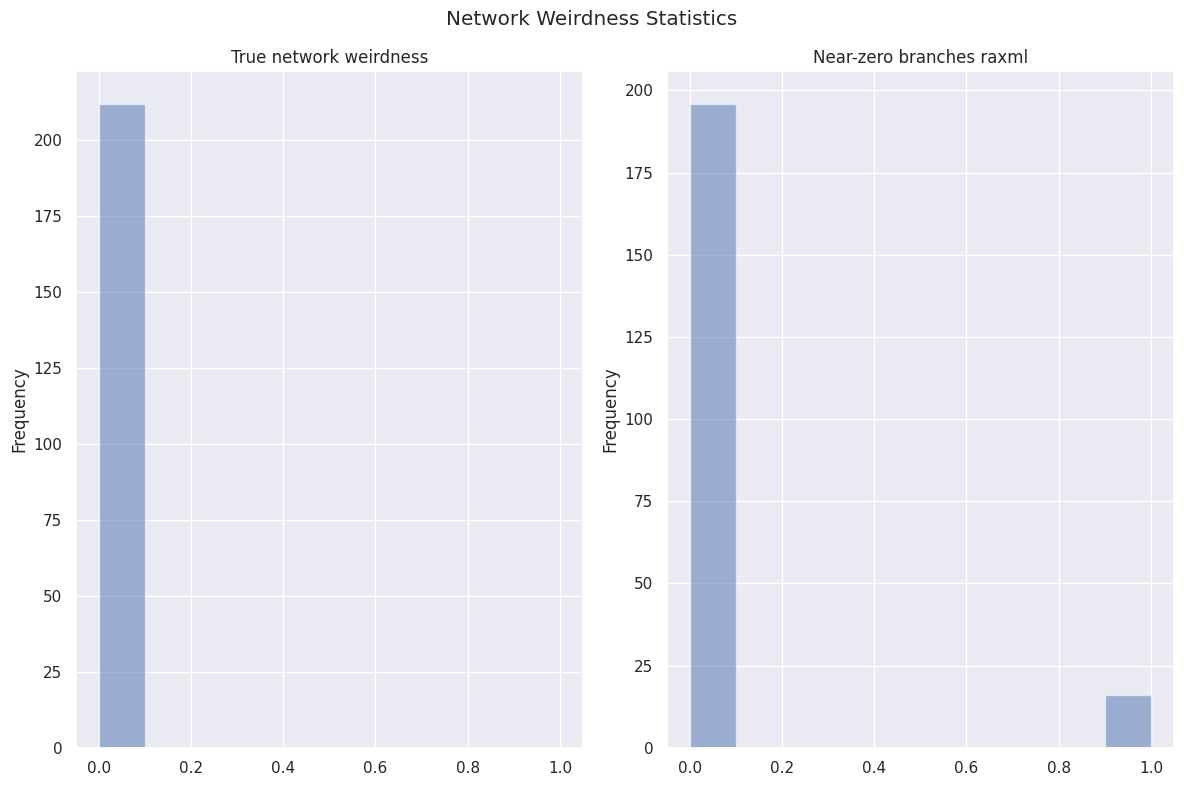

<Figure size 1200x800 with 0 Axes>

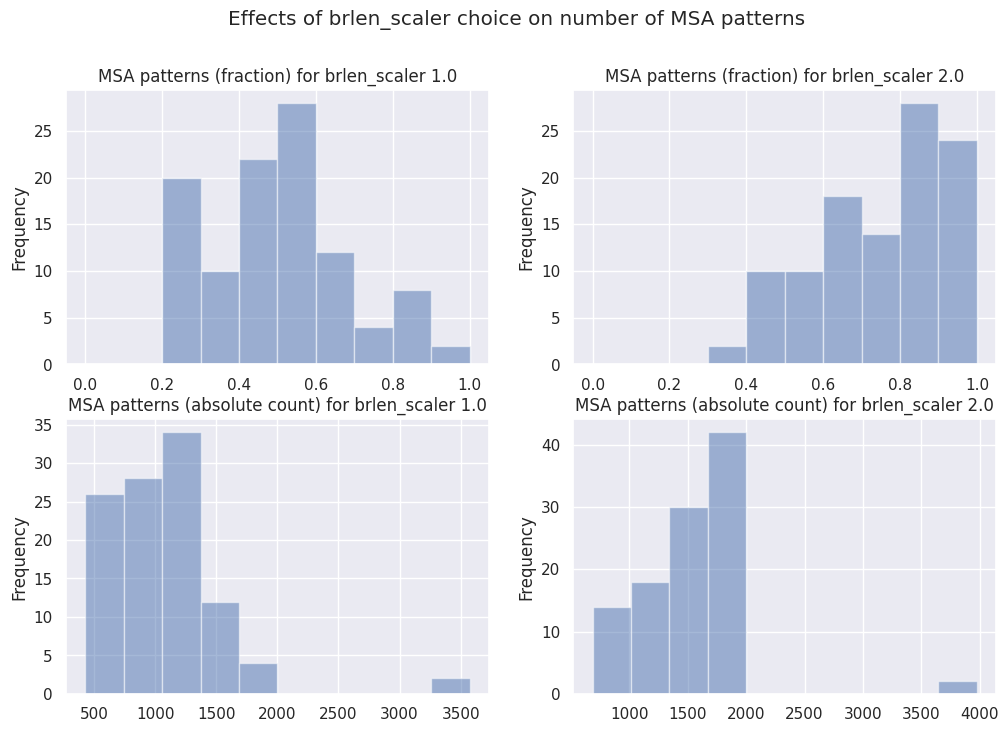

In [5]:
show_stats(df)

# Simulated dataset statistics after removing all "weird" networks and filtering out too tiny MSAs

Total number of datasets: 212


<Figure size 1200x800 with 0 Axes>

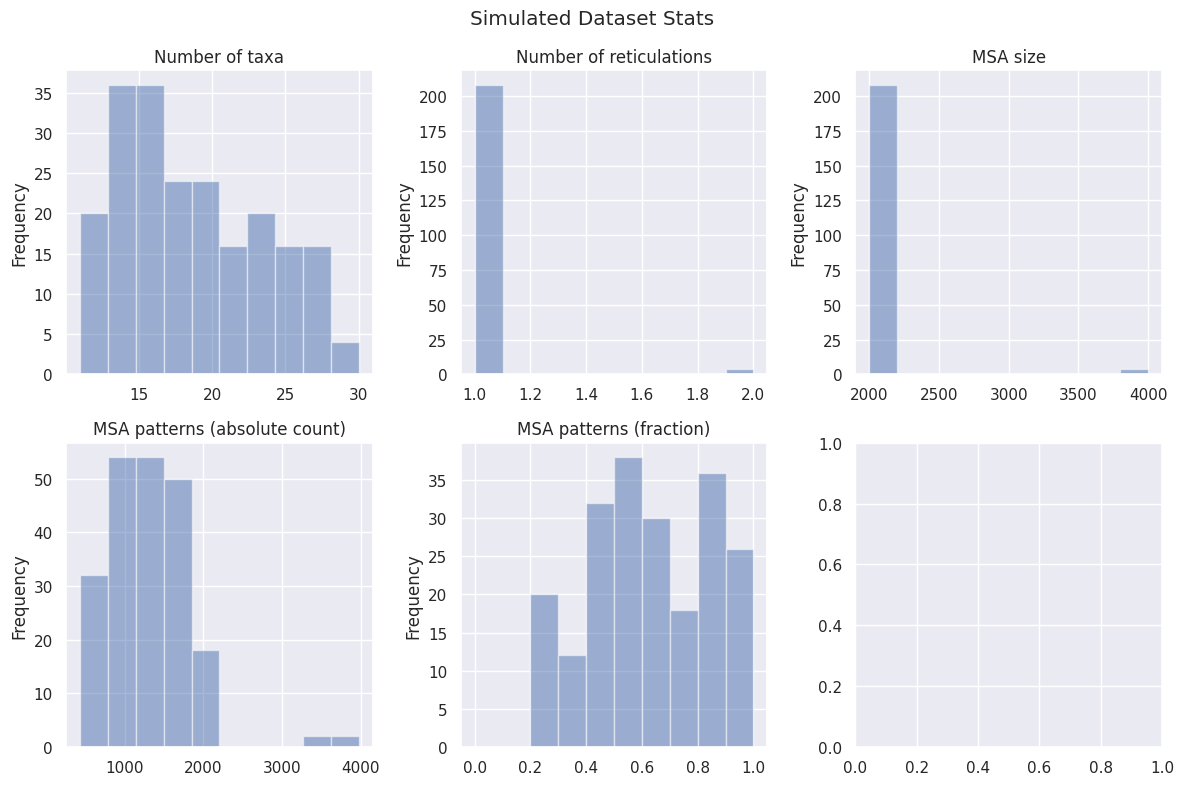

<Figure size 1200x800 with 0 Axes>

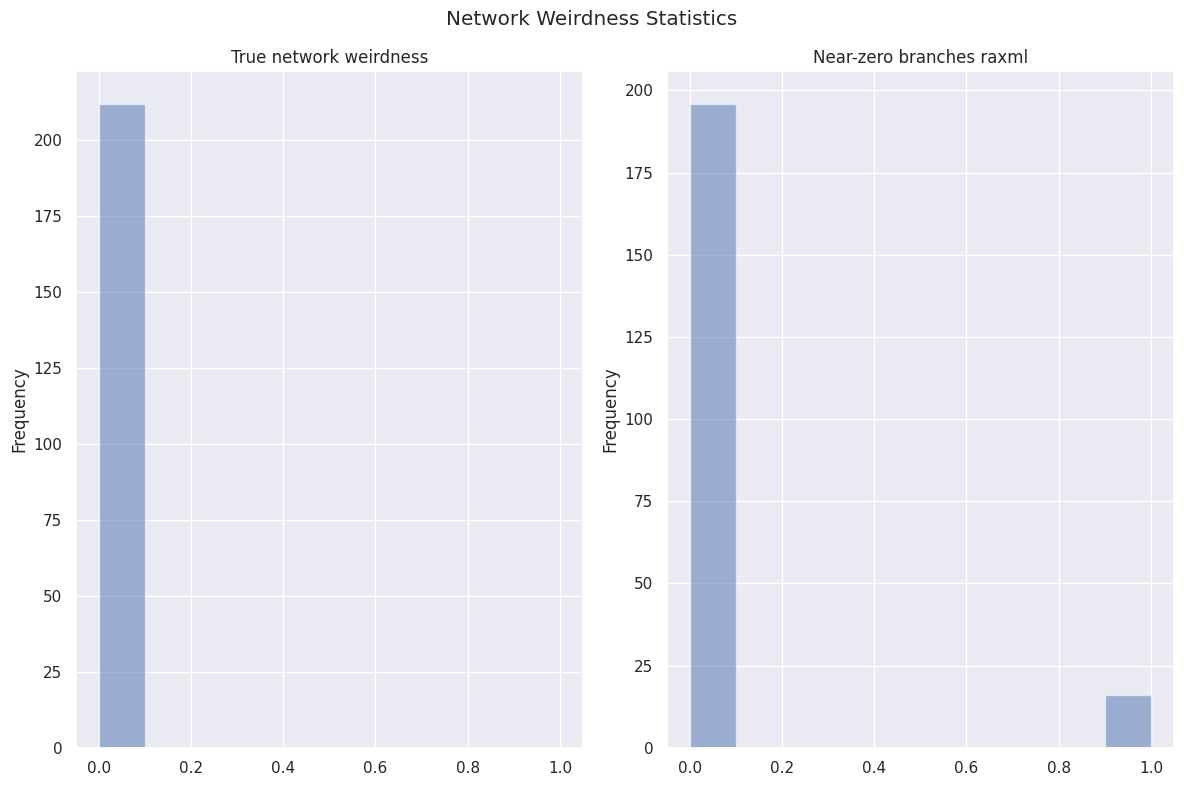

<Figure size 1200x800 with 0 Axes>

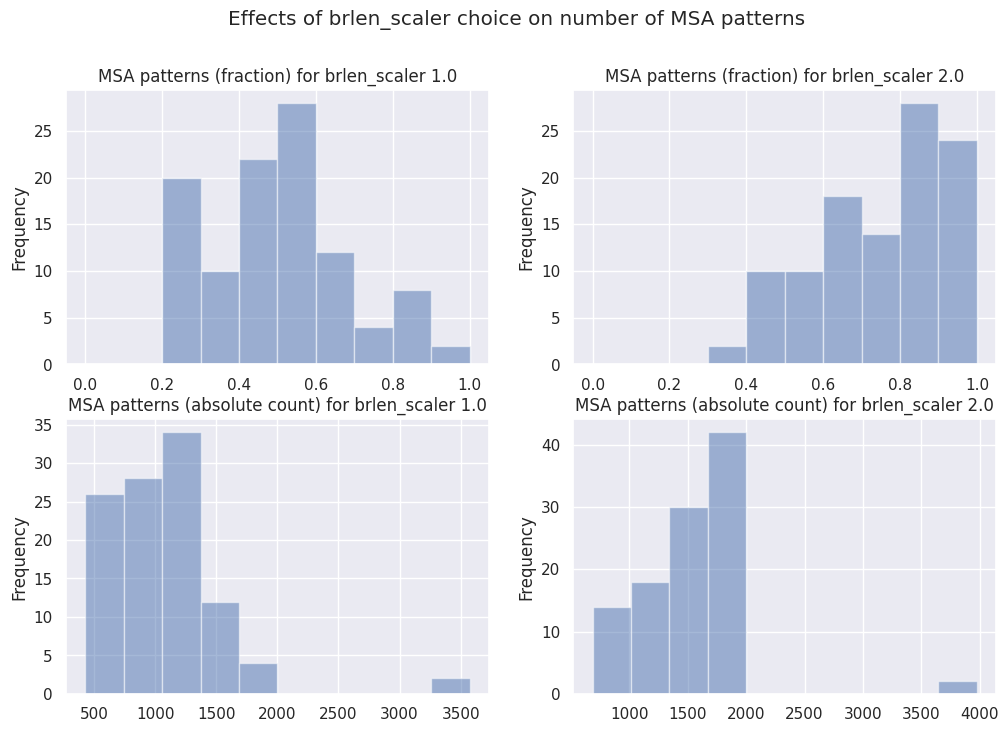

In [6]:
df_nonweird = df.query('(true_network_weirdness == 0.0) & msa_patterns >= 400')
show_stats(df_nonweird)

# Evaluation starting from raxml-ng best tree

+--------------------------------+------------------------+---------------------+---------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |    Overall    |
+--------------------------------+------------------------+---------------------+---------------+
|  Inferred BIC better or equal  |      51 (48.11 %)      |     44 (41.51 %)    |  95 (44.81 %) |
|       Inferred BIC worse       |      55 (51.89 %)      |     62 (58.49 %)    | 117 (55.19 %) |
| Inferred logl better or equal  |      40 (37.74 %)      |     32 (30.19 %)    |  72 (33.96 %) |
|      Inferred logl worse       |      66 (62.26 %)      |     74 (69.81 %)    | 140 (66.04 %) |
| Inferred n_reticulations less  |      53 (50.00 %)      |     58 (54.72 %)    | 111 (52.36 %) |
| Inferred n_reticulations equal |      52 (49.06 %)      |     48 (45.28 %)    | 100 (47.17 %) |
| Inferred n_reticulations more  |       1 (0.94 %)       |      0 (0.00 %)     |   1 (0.47 %)  |
+-------------------

<Figure size 1200x800 with 0 Axes>

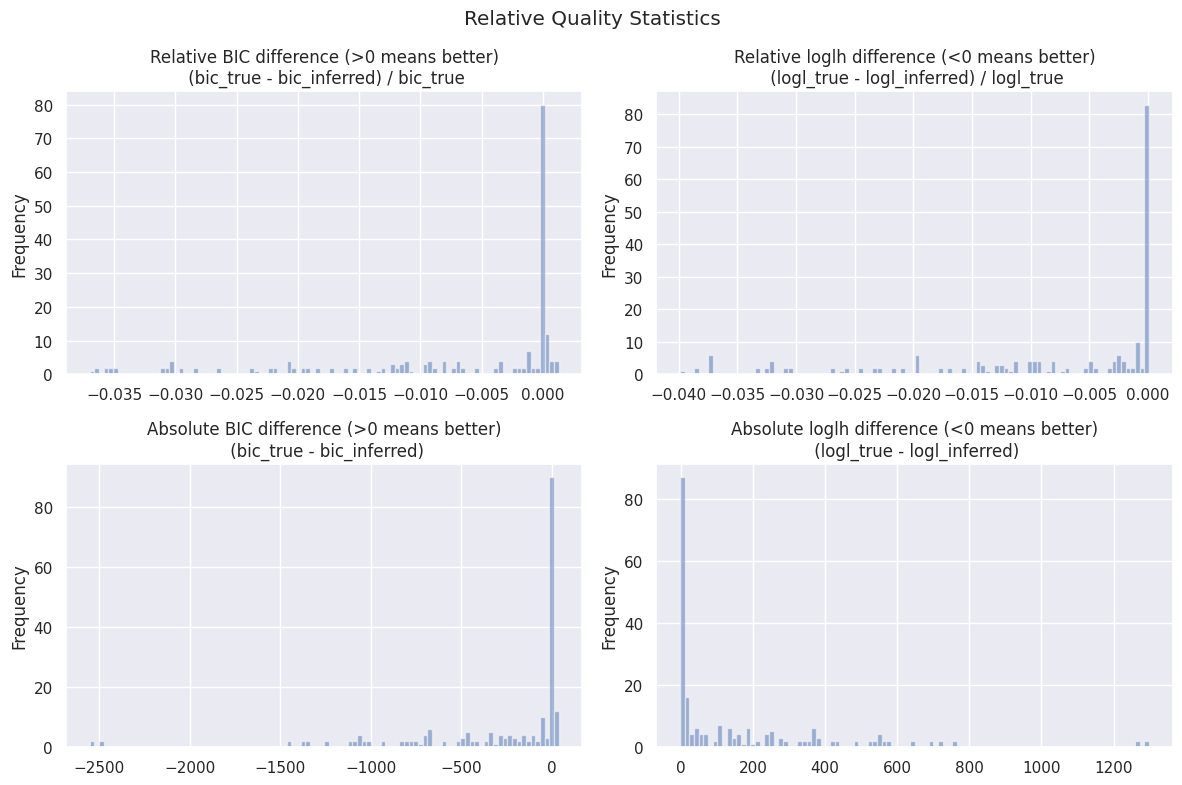

<Figure size 1200x800 with 0 Axes>

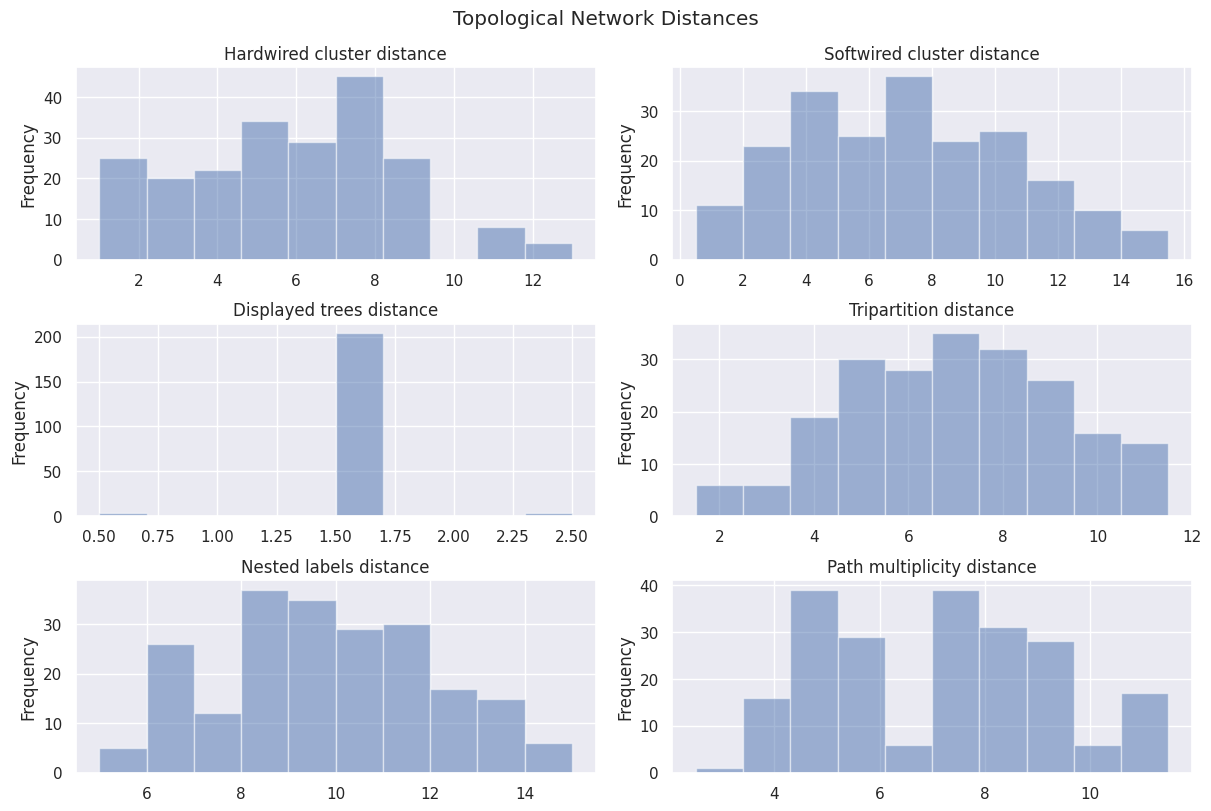

In [7]:
df_nonweird_start_from_raxml = df_nonweird.query('start_type == "FROM_RAXML"')
if len(df_nonweird_start_from_raxml) > 0:
    show_plots(df_nonweird_start_from_raxml)
else:
    print("No data found for StartType.FROM_RAXML")

## Evaluation starting from raxml-ng best tree, by brlen scaling factor


Evaluation for brlen scaling factor 1.0:

+--------------------------------+------------------------+---------------------+--------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |   Overall    |
+--------------------------------+------------------------+---------------------+--------------+
|  Inferred BIC better or equal  |      22 (41.51 %)      |     17 (32.08 %)    | 39 (36.79 %) |
|       Inferred BIC worse       |      31 (58.49 %)      |     36 (67.92 %)    | 67 (63.21 %) |
| Inferred logl better or equal  |      17 (32.08 %)      |     11 (20.75 %)    | 28 (26.42 %) |
|      Inferred logl worse       |      36 (67.92 %)      |     42 (79.25 %)    | 78 (73.58 %) |
| Inferred n_reticulations less  |      31 (58.49 %)      |     34 (64.15 %)    | 65 (61.32 %) |
| Inferred n_reticulations equal |      21 (39.62 %)      |     19 (35.85 %)    | 40 (37.74 %) |
| Inferred n_reticulations more  |       1 (1.89 %)       |      0 (0.00 %)     |  1

<Figure size 1200x800 with 0 Axes>

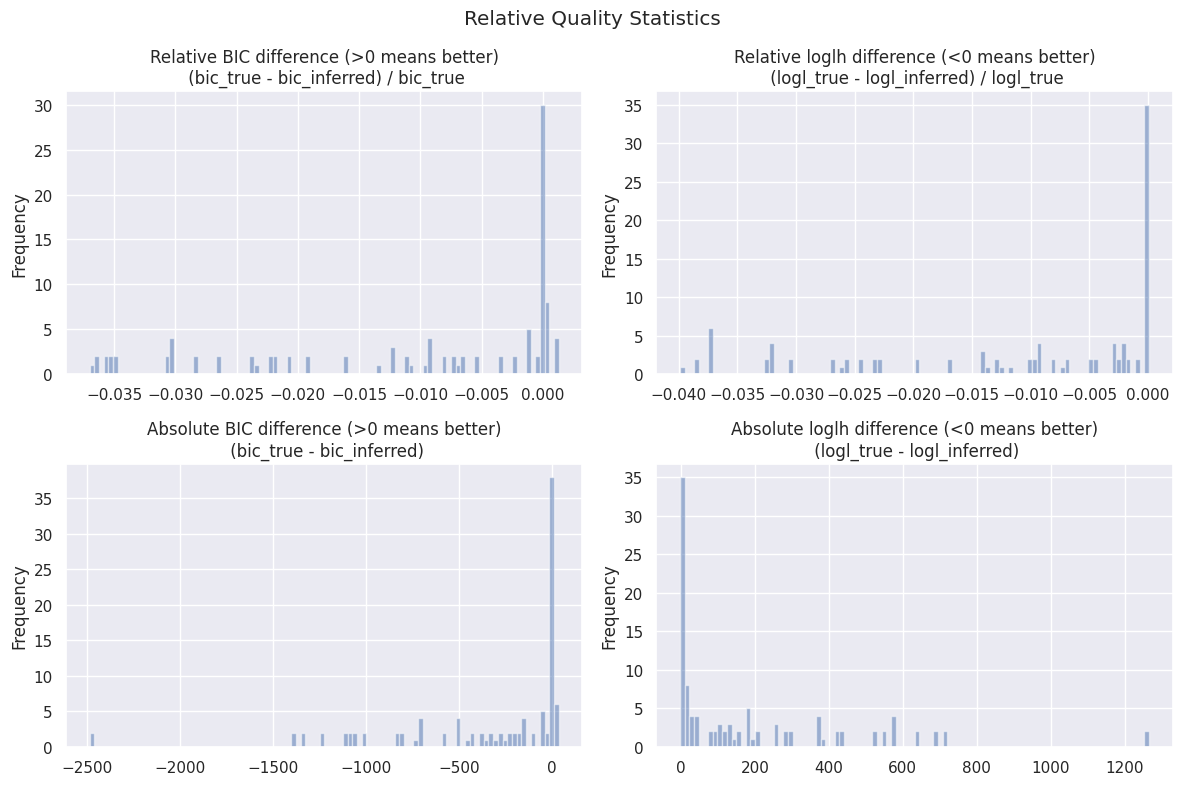

<Figure size 1200x800 with 0 Axes>

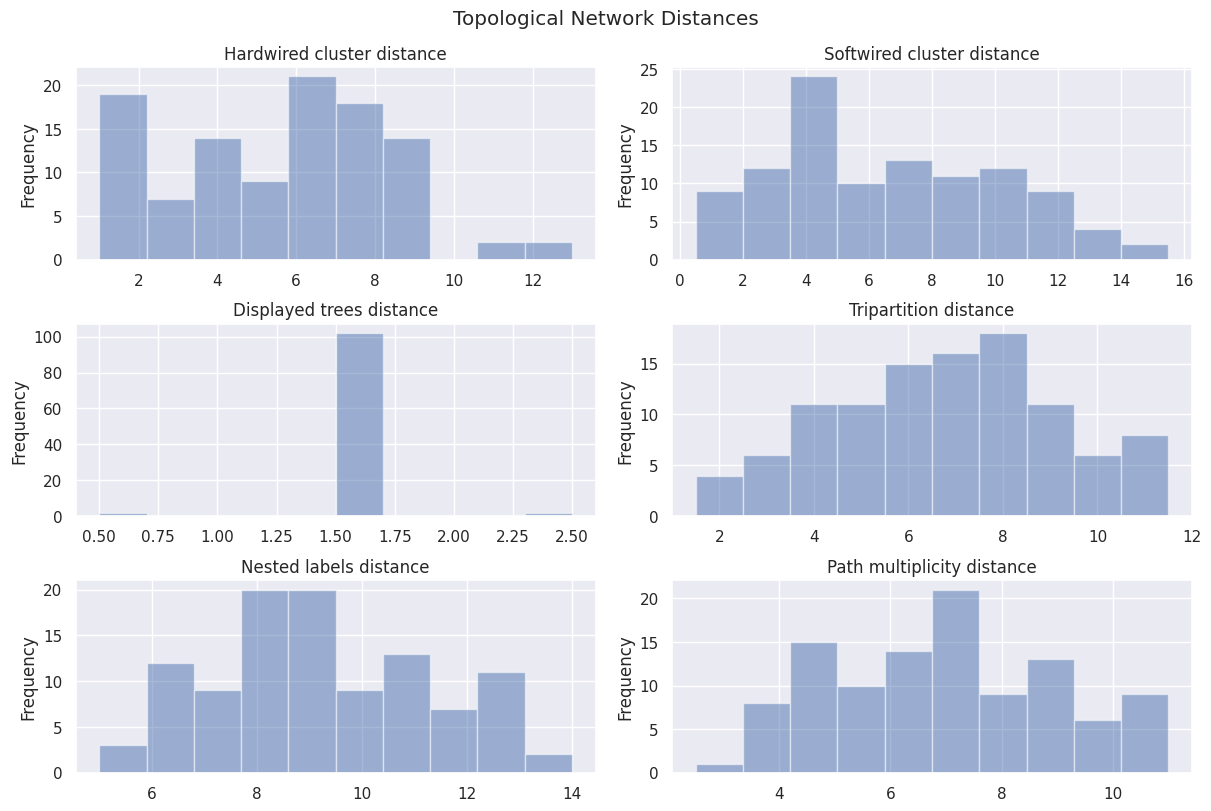


Evaluation for brlen scaling factor 2.0:

+--------------------------------+------------------------+---------------------+--------------+
|                                | LikelihoodType.AVERAGE | LikelihoodType.BEST |   Overall    |
+--------------------------------+------------------------+---------------------+--------------+
|  Inferred BIC better or equal  |      29 (54.72 %)      |     27 (50.94 %)    | 56 (52.83 %) |
|       Inferred BIC worse       |      24 (45.28 %)      |     26 (49.06 %)    | 50 (47.17 %) |
| Inferred logl better or equal  |      23 (43.40 %)      |     21 (39.62 %)    | 44 (41.51 %) |
|      Inferred logl worse       |      30 (56.60 %)      |     32 (60.38 %)    | 62 (58.49 %) |
| Inferred n_reticulations less  |      22 (41.51 %)      |     24 (45.28 %)    | 46 (43.40 %) |
| Inferred n_reticulations equal |      31 (58.49 %)      |     29 (54.72 %)    | 60 (56.60 %) |
| Inferred n_reticulations more  |       0 (0.00 %)       |      0 (0.00 %)     |  0

<Figure size 1200x800 with 0 Axes>

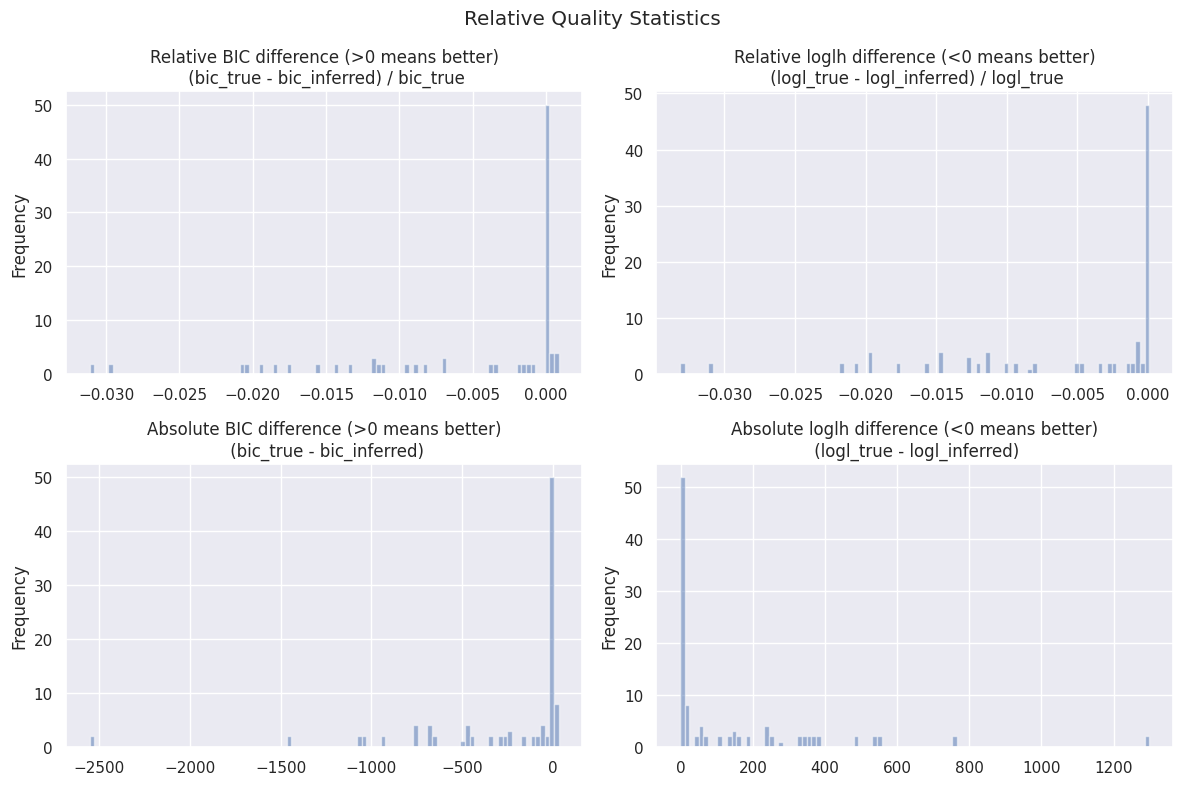

<Figure size 1200x800 with 0 Axes>

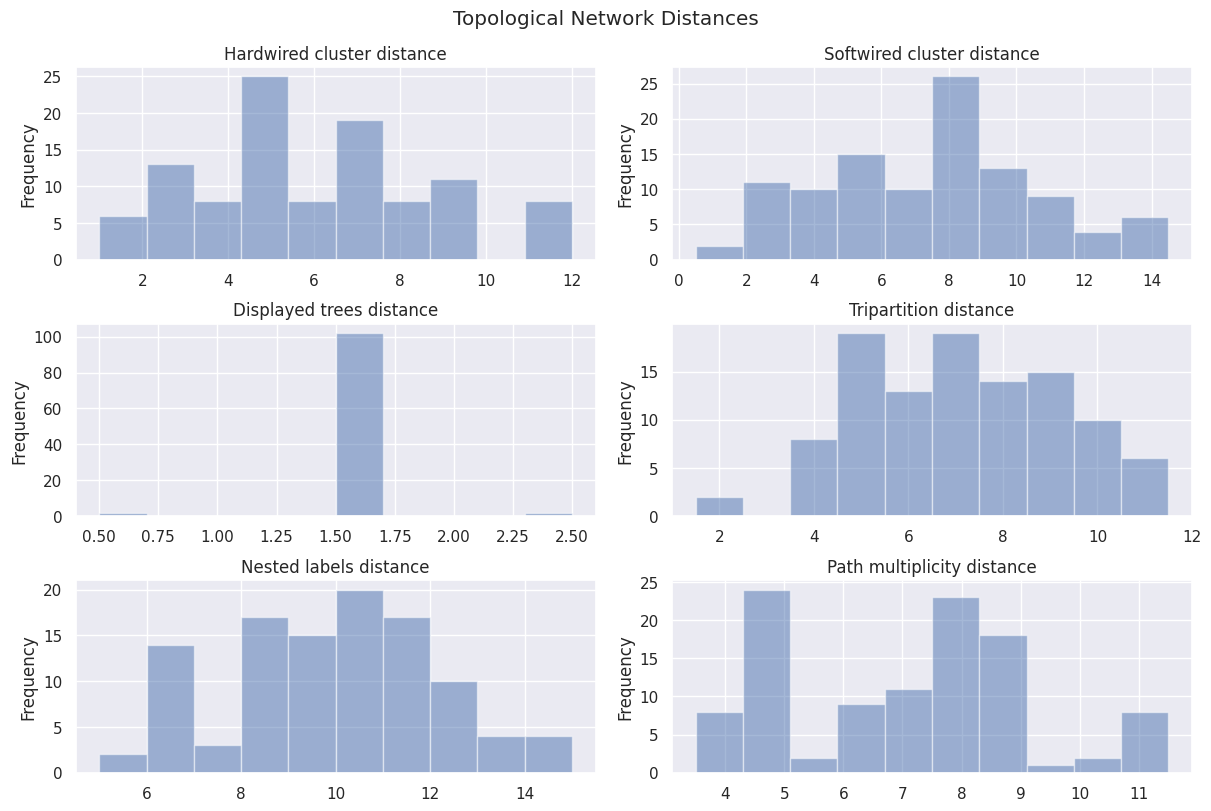

In [8]:
if 'brlen_scaler' in df_nonweird_start_from_raxml:
    scalers = df_nonweird_start_from_raxml.brlen_scaler.unique()
    for scaler in scalers:
        print("===========================================================\n")
        print("Evaluation for brlen scaling factor " + str(scaler) + ":\n")
        df_nonweird_start_from_raxml_scaled = df_nonweird_start_from_raxml.query('brlen_scaler == ' + str(scaler))
        show_plots(df_nonweird_start_from_raxml_scaled)

# Evaluation starting from 5 random + 5 parsimony trees

In [9]:
df_nonweird_random = df_nonweird.query('start_type == "RANDOM"')

if len(df_nonweird_random) > 0:
    show_plots(df_nonweird_random)
else:
    print("No data found for StartType.RANDOM")

No data found for StartType.RANDOM


## Evaluation starting from 5 random + 5 parsimony trees, by brlen scaling factor

In [10]:
if 'brlen_scaler' in df_nonweird_random:
    scalers = df_nonweird_random.brlen_scaler.unique()
    for scaler in scalers:
        print("===========================================================\n")
        print("Evaluation for brlen scaling factor " + str(scaler) + ":\n")
        df_nonweird_random_scaled = df_nonweird_random.query('brlen_scaler == ' + str(scaler))
        show_plots(df_nonweird_random_scaled)